# 1. Load, parse, and visualize data

In [220]:
#SciPy, Pandas, Seaborn

# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers, performance metrics, and shuffle
from sklearn import datasets, svm, metrics

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix

In [221]:
# The digits dataset
digits = datasets.load_digits()

In [222]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

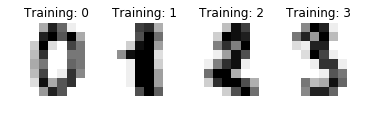

In [223]:
 plt.show()

# 2. Select the ML models

In [224]:
# Select 1500 images to be used for training/testing sets
digits.images = digits.images[:1500]

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

n_samples = len(data)

In [225]:
# Create a classifier: a PLA classifier
perceptron = Perceptron()

In [226]:
# Create a classifier: a logistic classifier
logistic = linear_model.LogisticRegression()

# 3. Train the models

In [227]:
training_size = int(n_samples * (2/3))

X_train = data[:training_size]
X_test = digits.target[:training_size]

y_train = data[training_size:n_samples]
y_test = digits.target[training_size:n_samples]

In [228]:
perceptron.fit(X_train, X_test)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [229]:
logistic.fit(X_train, X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# 4. Validate and evaluate the models

In [230]:
expected_perceptron = y_test
predicted_perceptron = perceptron.predict(y_train)

In [231]:
expected_logistic = y_test
predicted_logistic = logistic.predict(y_train)

## Perceptron Evaluation

### Accuracy 

In [232]:
perceptron_accuracy = np.sum(predicted_perceptron==expected_perceptron)/len(expected_perceptron)
print(perceptron_accuracy)

0.926


### Confusion Matrix

In [234]:
perceptron_confusion_matrix = confusion_matrix(predicted_perceptron, expected_perceptron)
print(perceptron_confusion_matrix)

[[51  3  2  0  2  0  0  0  0  1]
 [ 0 42  0  1  0  0  0  2  2  0]
 [ 0  0 48  0  0  1  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 1  0  0  1  0 49  0  0  2  4]
 [ 0  1  0  0  0  1 50  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  3  0  1  0  1  0  0 44  7]
 [ 0  0  0  0  1  0  0  0  0 38]]


## Logistic Regression Evaluation

### Accuracy

In [218]:
logistic_accuracy = np.sum(predicted_logistic==expected_logistic)/len(expected_logistic)
print(logistic_accuracy)

0.956


### Confusion Matrix

In [235]:
logistic_confusion_matrix = confusion_matrix(predicted_logistic, expected_logistic)
print(logistic_confusion_matrix)

[[51  0  1  0  0  0  0  0  0  1]
 [ 0 43  0  0  0  0  0  0  3  0]
 [ 0  0 49  0  0  1  0  0  1  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 1  0  0  1  0 50  0  0  2  0]
 [ 0  0  0  0  1  1 50  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  2  0  1  0  0  0  0 42  0]
 [ 0  4  0  1  1  0  0  0  0 49]]
